# Imports

In [88]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import tree 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict

In [89]:
titanic = pd.DataFrame(pd.read_excel('Dataset_Titanic.xlsx'))

# Preprocessing / Feature Engineering

In [90]:
# One Hot Encoding Sex
def num_sex(df):
    result = 0
    if df.Sex == 'male':
        result = 1
    return result
titanic["Sex"] = titanic.apply(lambda row: num_sex(row), axis = 1)

In [91]:
# Adding Information about Fare
percentile_fare = np.percentile(titanic.Fare,80)
def fare_percentile(df):
    result = 0
    if df.Fare > percentile_fare :
        result = 1
    return result 
titanic["Fare_Superior_to_Mean"] = titanic.apply(lambda row : fare_percentile(row), axis = 1)

In [92]:
titanic = titanic.drop(["Fare"],axis =1)

In [93]:
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare_Superior_to_Mean
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,1
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,1
4,0,3,Mr. William Henry Allen,1,35.0,0,0,0
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,0
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,0
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,0
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,0


# Statistical Analysis

## Statistics

In [94]:
titanic_stats = titanic.drop(["Survived","Sex","Fare_Superior_to_Mean","Name"],axis = 1)
titanic_stats.describe()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard
count,887.000000,887.000000,887.000000,887.000000
mean,2.305524,29.471443,0.525366,0.383315
std,0.836662,14.121908,1.104669,0.807466
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.250000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


## Charts

### Box-plot

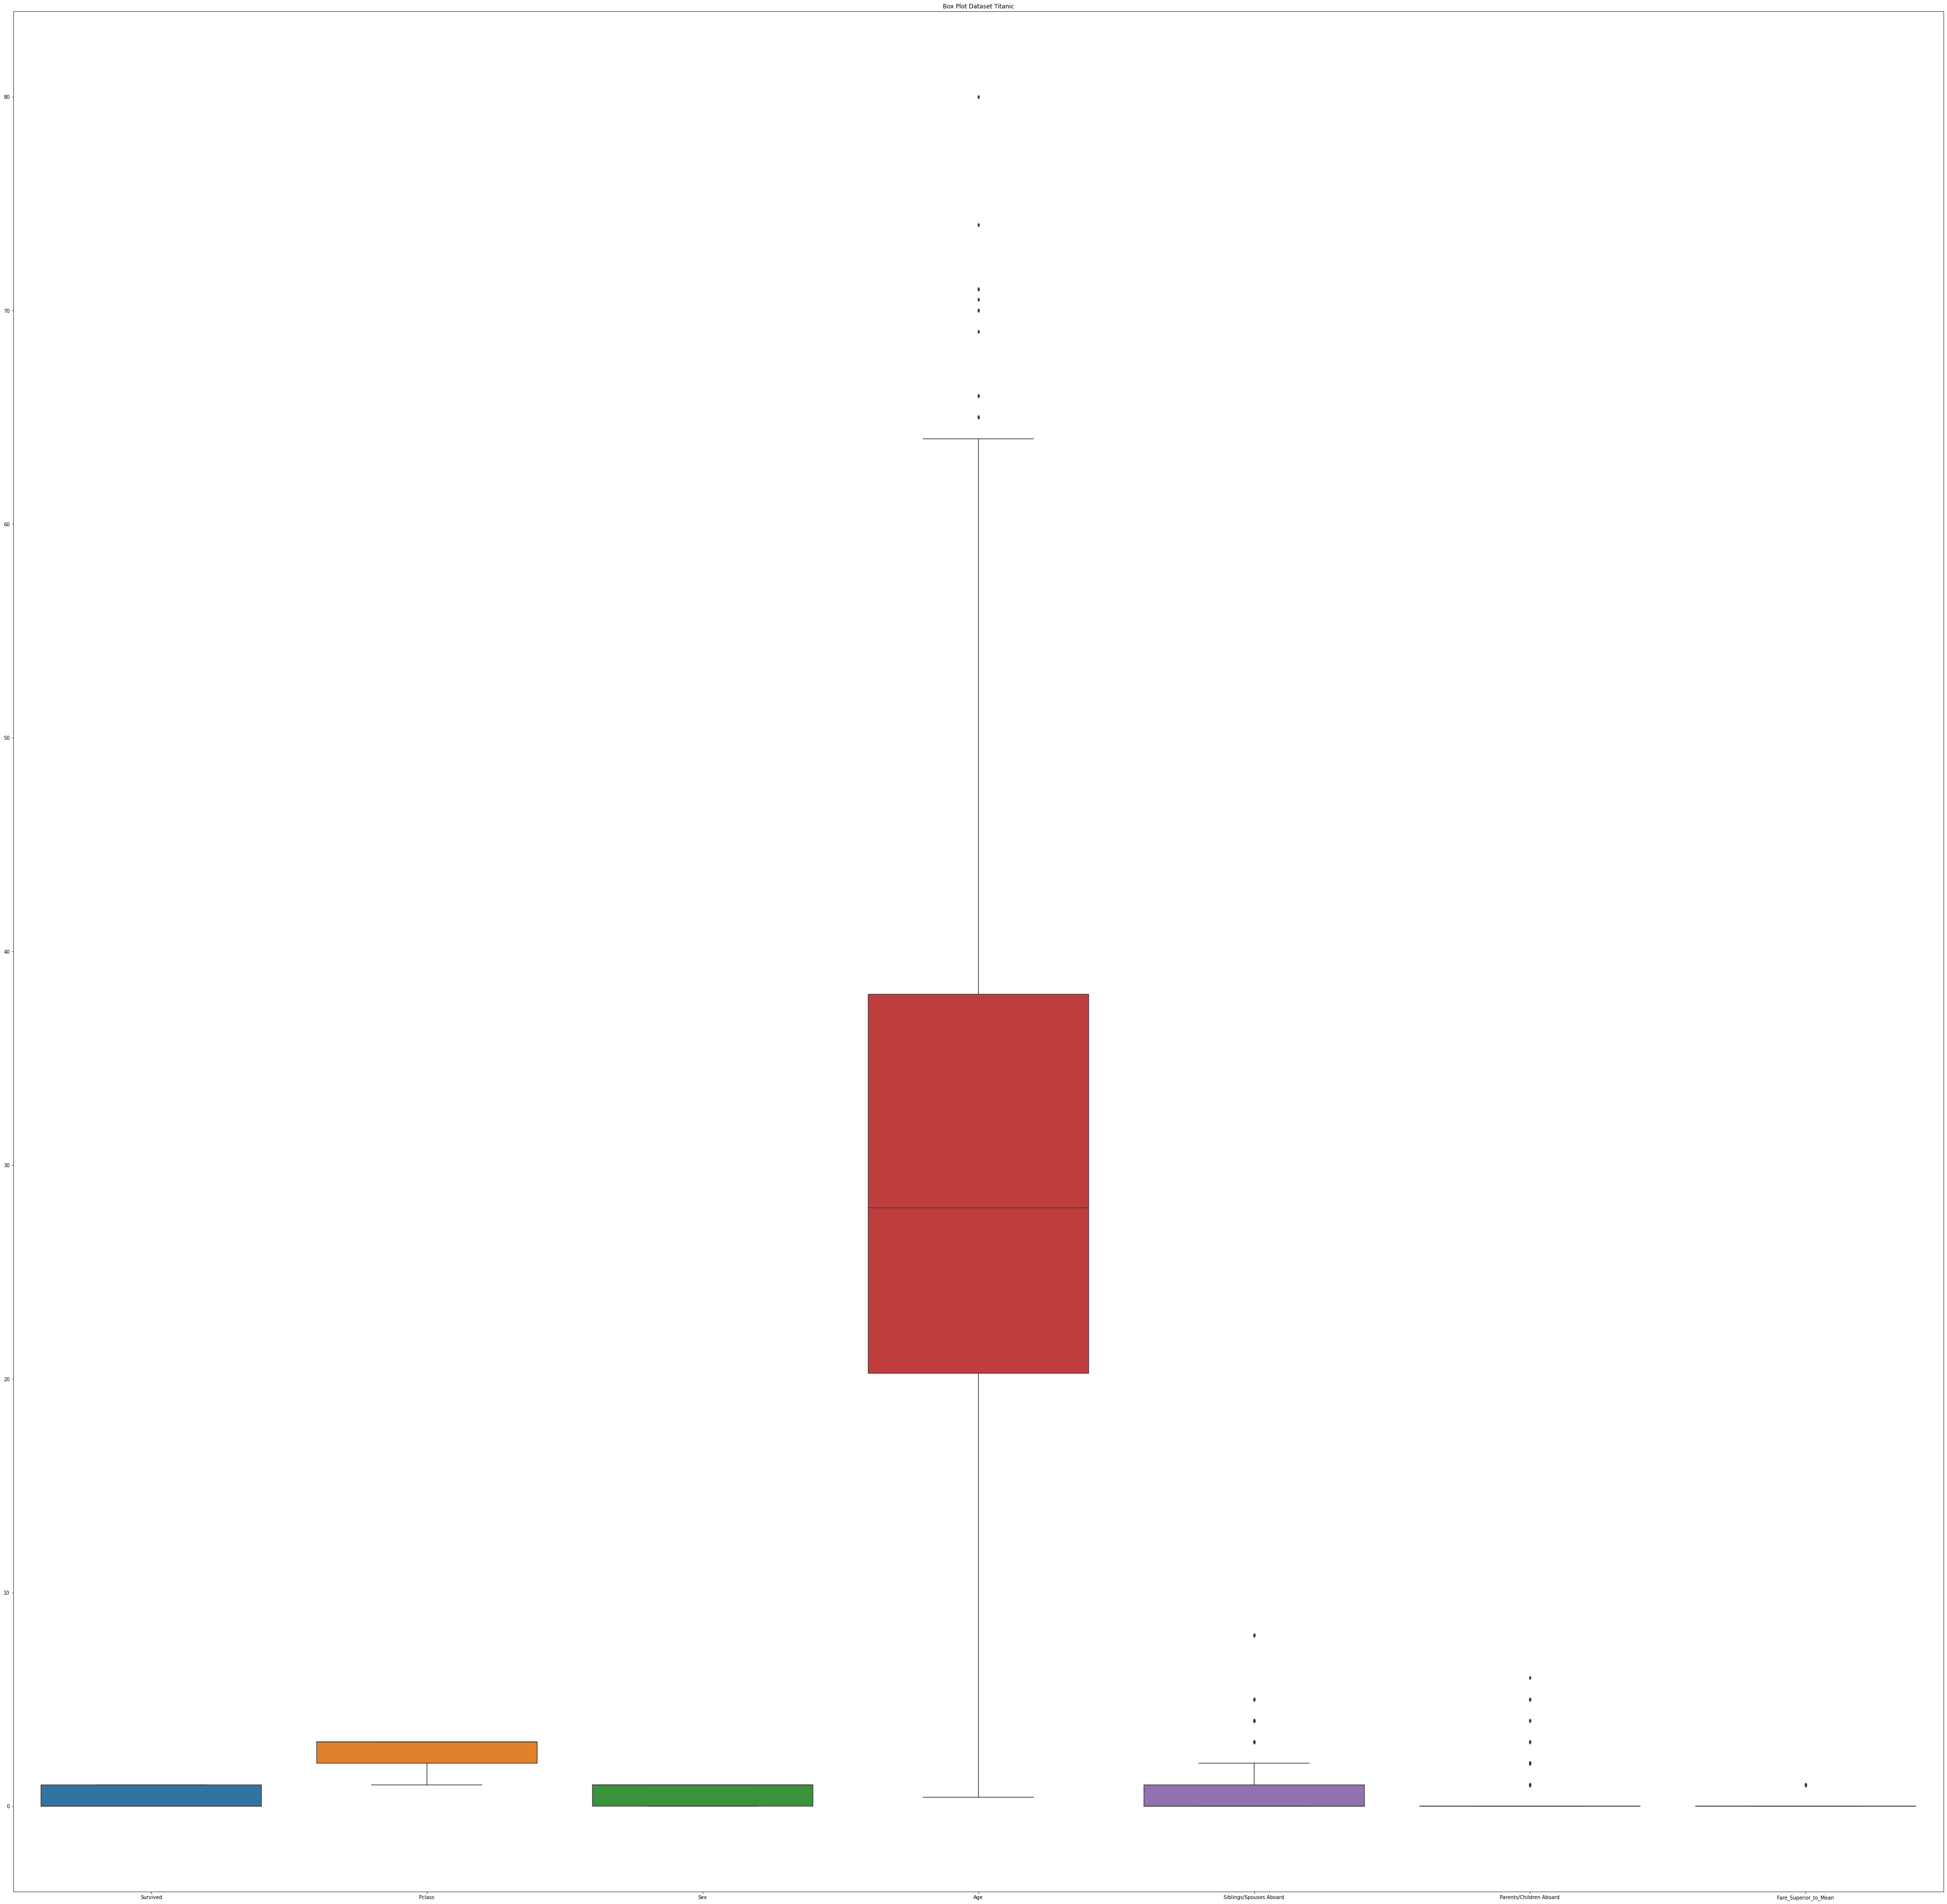

<Figure size 5040x5040 with 0 Axes>

In [95]:
sns.boxplot(data = titanic.drop(["Name"],axis = 1))
plt.title('Box Plot Dataset Titanic')
plt.figure()
plt.rc('figure', figsize=[50, 50])

**Conclusion :** There are few extreme values in this dataset. The biggest part of the aberrant values are values in Age, that is not surprising. 

### Chart about Features

#### About Survival

In [96]:
titanic_survival = titanic.copy()

In [97]:
#Creating a columns to count the number of survivors and dead people

In [98]:
def survival_yes(df):
    result = 0
    if df.Survived == 1:
        result = 1
    return result 
titanic_survival["Survival_Yes"]=titanic_survival.apply(lambda row : survival_yes(row), axis = 1)

In [99]:
def survival_no(df):
    result = 0
    if df.Survived == 0:
        result = 1
    return result 
titanic_survival["Survival_No"]=titanic_survival.apply(lambda row : survival_no(row), axis = 1)

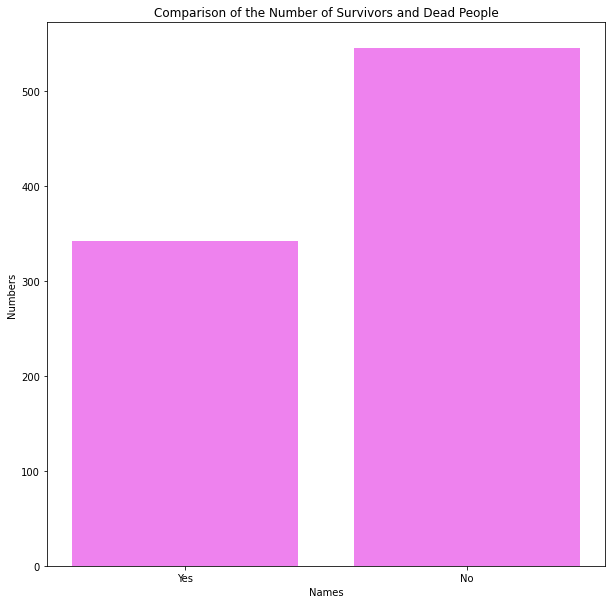

<Figure size 720x720 with 0 Axes>

In [101]:
#Ploting
yes = np.sum(titanic_survival.Survival_Yes)
no = np.sum(titanic_survival.Survival_No)
list_survivors = [yes,no]
names = ["Yes","No"]
plt.title("Comparison of the Number of Survivors and Dead People")
plt.xlabel("Names")
plt.ylabel("Numbers")
plt.bar(names,list_survivors, color = "violet")
plt.figure()
plt.rc('figure', figsize=[10, 10])

**Conclusion :** There were more dead people than survivors. 

#### About classes

In [102]:
#Creating a new dataframe to analyse how many people survived per class
titanic_class = titanic_survival.groupby(["Pclass"]).agg({"Survival_Yes":"sum","Survival_No":"sum"}).reset_index()

In [103]:
#Using list to plot
yes_2 = list(titanic_class.Survival_Yes)
no_2 = list(titanic_class.Survival_No)
class_list = list(titanic_class.Pclass)

Text(0, 0.5, '# People')

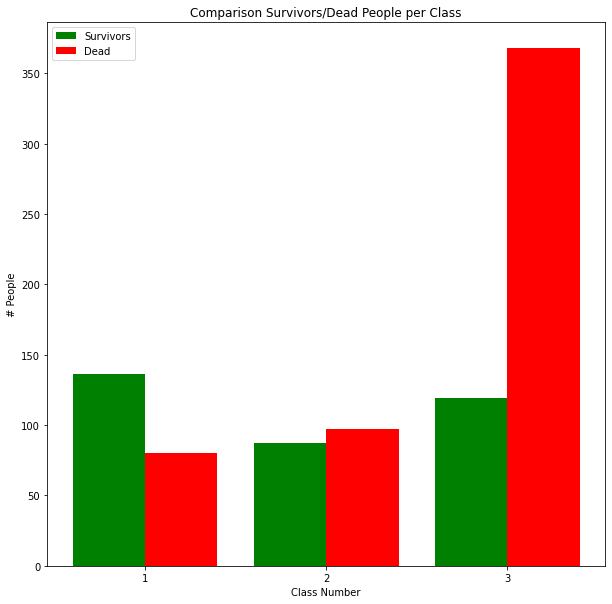

In [104]:
#Plotting
barWidth = 0.4
r1 = range(len(yes_2))
r2 = [x + barWidth for x in r1]
plt.title("Comparison Survivors/Dead People per Class")
plt.bar(r1, yes_2, width = barWidth, color = ['green' for i in yes_2],linewidth = 2, label = "Survivors")
plt.bar(r2, no_2, width = barWidth, color = ['red' for i in yes_2],linewidth = 4, label = "Dead")
plt.xticks([r + barWidth / 2 for r in range(len(yes_2))], ['1', '2', '3'])
plt.legend(loc = "upper left")
plt.xlabel("Class Number")
plt.ylabel("# People")

**Conclusion :** In function of the classes, people had more or less chance to survive. We can notice that people who were in the 2nd or 3rd Class had more chance to die than people in the 1st Class. In terms of propostion, 

#### About Age

In [105]:
#Printing minimum and maximum age
minAge = min(titanic.Age)
maxAge = max(titanic.Age)
print("Minimum : ", minAge, ", Maximum : ", maxAge)

Minimum :  0.42 , Maximum :  80.0


In [106]:
#Isolating age of passengers
list_age = list(titanic.Age)

In [107]:
#Counting number of elements in classes of age
less_10yo = []
less_20yo = []
less_30yo = []
less_40yo = []
less_50yo = []
less_60yo = []
less_70yo = []
less_80yo = []
over_80yo = []

for i in list_age : 
    if ((i>=0) & (i <10)) :
        less_10yo.append(i)
    elif ((i>=10) & (i <20)): 
        less_20yo.append(i)
    elif ((i>=20) & (i <30)): 
        less_30yo.append(i)
    elif ((i>=30) & (i <40)) :
        less_40yo.append(i)
    elif ((i>=40) & (i <50)) :
        less_50yo.append(i)
    elif ((i>=50) & (i <60)) : 
        less_60yo.append(i)
    elif ((i>=60) & (i <70)):
        less_70yo.append(i)
    elif ((i>=70) & (i <80)): 
        less_80yo.append(i)
    else : 
        over_80yo.append(i)

In [108]:
#Controlling
len(less_10yo)+len(less_20yo)+len(less_30yo)+len(less_40yo)+len(less_50yo)+len(less_60yo)+len(less_70yo)+len(less_80yo)+len(over_80yo)

887

Text(0, 0.5, '# People')

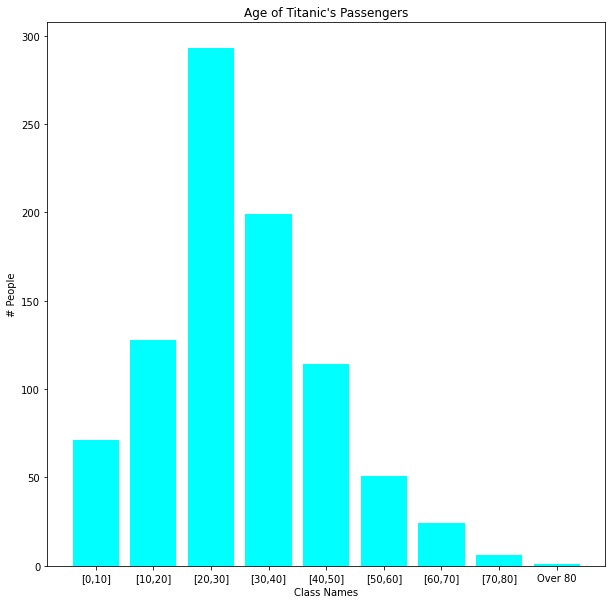

In [109]:
#Plotting
names_class = ["[0,10]","[10,20]","[20,30]","[30,40]","[40,50]","[50,60]","[60,70]","[70,80]","Over 80"]
list_count_age = [len(less_10yo),len(less_20yo),len(less_30yo),len(less_40yo),len(less_50yo),len(less_60yo),len(less_70yo),len(less_80yo),len(over_80yo)]
plt.title("Age of Titanic's Passengers")
plt.bar(names_class,list_count_age,color = "cyan")
plt.xlabel("Class Names")
plt.ylabel("# People")

# Train and Test Split 

How to split our dataframe ? We can use this methode : [((k−1)/k)*n ; (1/k)*n]. 

Generally, we use k = 3. 

In [22]:
# To simplify the use of some methods, we will use a dataframe composed exclusively of numerical values
titanic = titanic.drop(["Name"], axis = 1)

In [23]:
titanic_features = titanic.drop(["Survived"], axis = 1)
titanic_result = titanic.iloc[:,0]

In [24]:
X,y = titanic_features, titanic_result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(591, 6) (296, 6) (591,) (296,)


# Predicition

Now, it is time to make some predictions ! We will use different models in order to predict if someone survive or not. For all the models, we will use metrics to evaluate the precision of the prediction. 

In [25]:
#Grande étape : essayer de faire tous les modèles du cours + en chercher des nouveaux + transfert Learning. 

## Logistic Regression

Let's start with Logistic Regression. In order to simplify the code, we will use sklearn and it's functionnalities. 

### Choosing the best parameters

In [26]:
# To allow the algorithm to function correctly, it will be useful to standardize the data. 
stds = preprocessing.StandardScaler()
Z_train = stds.fit_transform(X_train)

In [27]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2","elasticnet", "none"]
}

model_logistic_regression = LogisticRegression(random_state=42,)

model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_logistic_regression.fit(Z_train, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print('-----')

-----
Best parameters {'C': 0.001, 'penalty': 'none'}
-----


/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

### Train

In [78]:
# lr stands for Logistic Regression
lr = LogisticRegression(penalty='none',C=0.01)
lr.fit(Z_train,y_train)

/Users/aurelienpayet/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, penalty='none')

### Analysis before testing

In [79]:
# Analysis of the impact of features
pd.DataFrame({"var":X_train.columns,"coef":lr.coef_[0]})

,var,coef
0,Pclass,-1.061355
1,Sex,-1.305849
2,Age,-0.698338
3,Siblings/Spouses Aboard,-0.485121
4,Parents/Children Aboard,0.081435
5,Fare_Superior_to_Mean,0.073614


**Interpretation of the coefficient :** The features Sex, Class and Age seems to be variables which influence the more the model. 

### Test

In [80]:
Z_test = stds.transform(X_test)

In [81]:
y_pred = lr.predict(Z_test)

### Analysis of the Prediction

#### Statistics

In [82]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       195
           1       0.71      0.71      0.71       101

    accuracy                           0.80       296
   macro avg       0.78      0.78      0.78       296
weighted avg       0.80      0.80      0.80       296



We made a test without creating Fare_Superior_to_Mean and without deleting the feature Fare, the result is the same.

#### ROC Curve

In [83]:
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, y_pred)

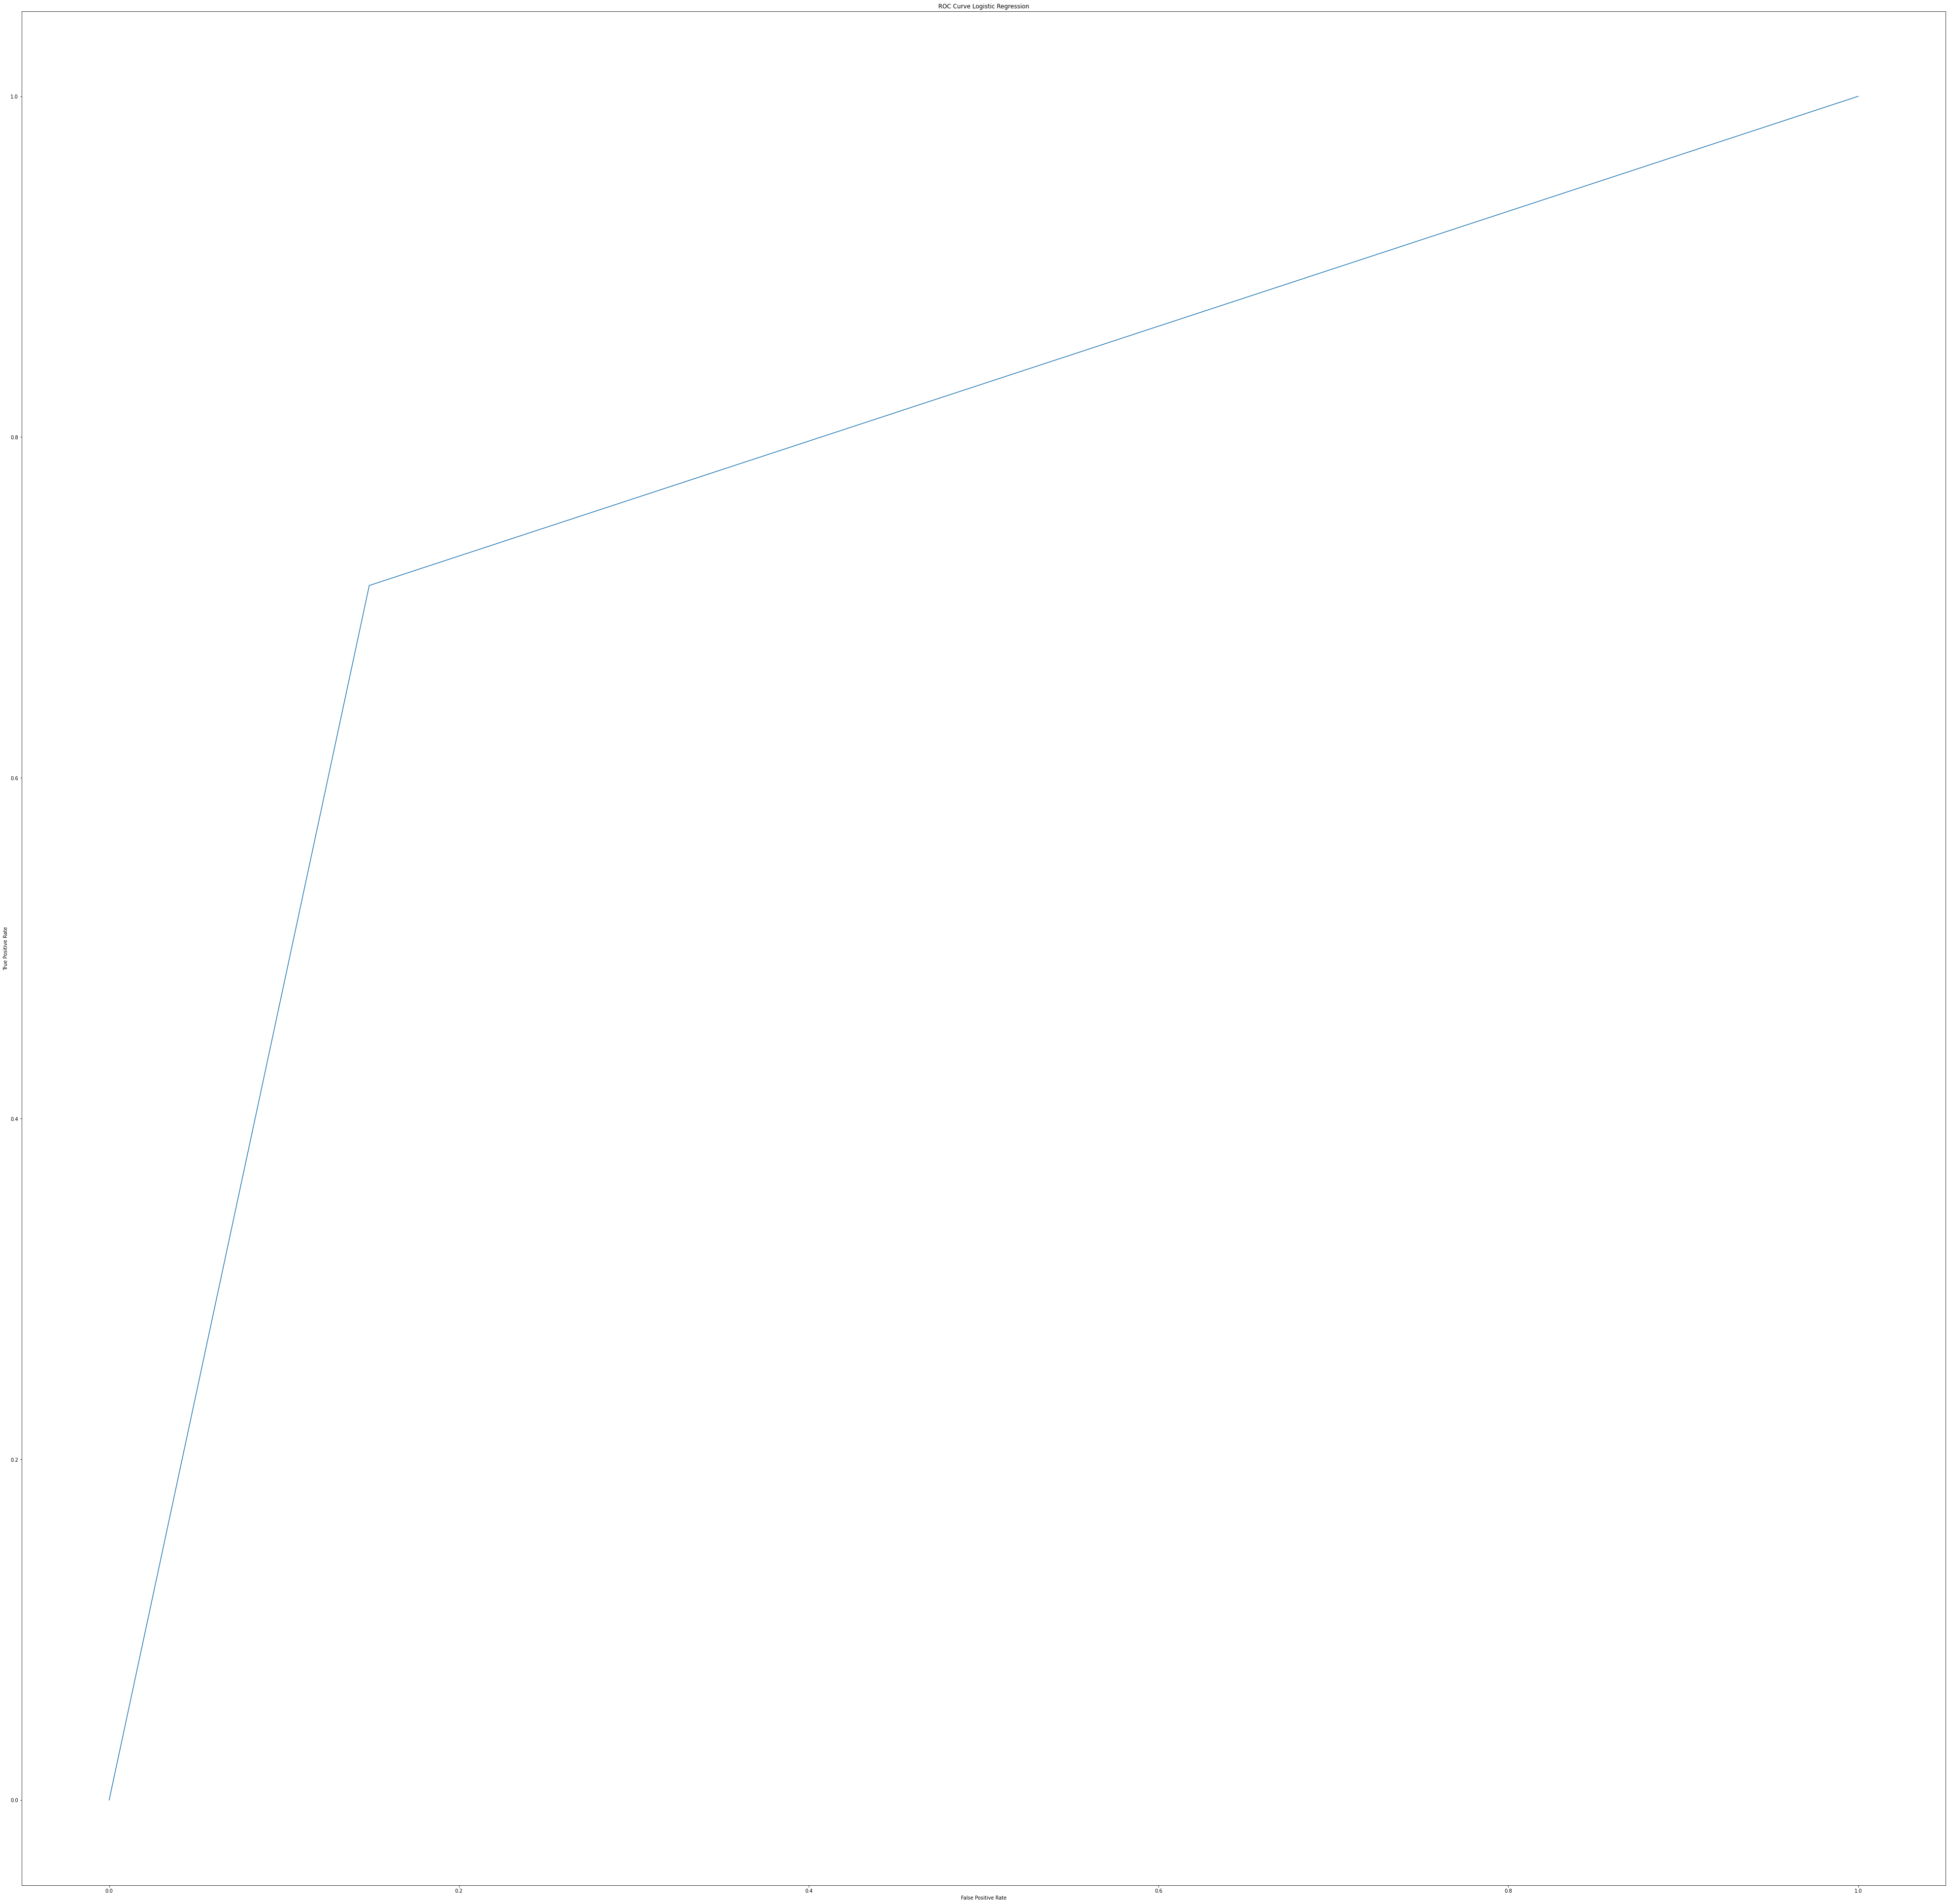

In [86]:
plt.title("ROC Curve Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(lr_fpr,lr_tpr)

In [85]:
lr_auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC for the Logistic Regression is ",lr_auc)

The AUC for the Logistic Regression is  0.782076669205382


#### Conclusion

**Conclusion :** We suceeded with this method to predict correctly 81% of what we want to predict. According to the f1-score, we seems to have more difficulties to predict if a person is a survivor. 

### Tuning

#### Deleting low correlated features

In [77]:
# Remodeling train and test split deleting the low correlated features
titanic_features2 = titanic.drop(["Survived","Parents/Children Aboard","Fare_Superior_to_Mean"], axis = 1)
titanic_result2 = titanic.iloc[:,0]
X2,y2 = titanic_features2, titanic_result2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=1/3)

# Making a new Logistic Regression with this new train-test split
stds2 = preprocessing.StandardScaler()
Z2_train = stds2.fit_transform(X2_train)
lr2 = LogisticRegression(penalty='l2', C = 0.01)
lr2.fit(Z2_train,y2_train)
Z2_test = stds2.transform(X2_test)

# Making the prediction and making a small analysis
y2_pred = lr2.predict(Z2_test)
print(metrics.classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       177
           1       0.78      0.61      0.68       119

    accuracy                           0.77       296
   macro avg       0.78      0.75      0.75       296
weighted avg       0.77      0.77      0.77       296



**Conclusion :** This model without low correlated features has nearly the same predictive ability. 

## 

## Decision Tree

Let's use decision trees to make another prediction. 

### Choosing the Best Parameters

In [75]:
parameters = {
    "max_depth": [3,4,5,6,7,8,9,10,11,12,13,14,15],
}

model_desicion_tree = tree.DecisionTreeClassifier(criterion = 'gini',random_state=42)
model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)
print('-----')
print(f'Best parameter {model_desicion_tree.best_params_}')
print('-----')

-----
Best parameter {'max_depth': 5}
-----


### Train

In [73]:
# Making a decision tree with maximum depth which has been defined thanks to GridSearchCV
clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth = 5 , random_state=42)
clf = clf.fit(X_train, y_train)

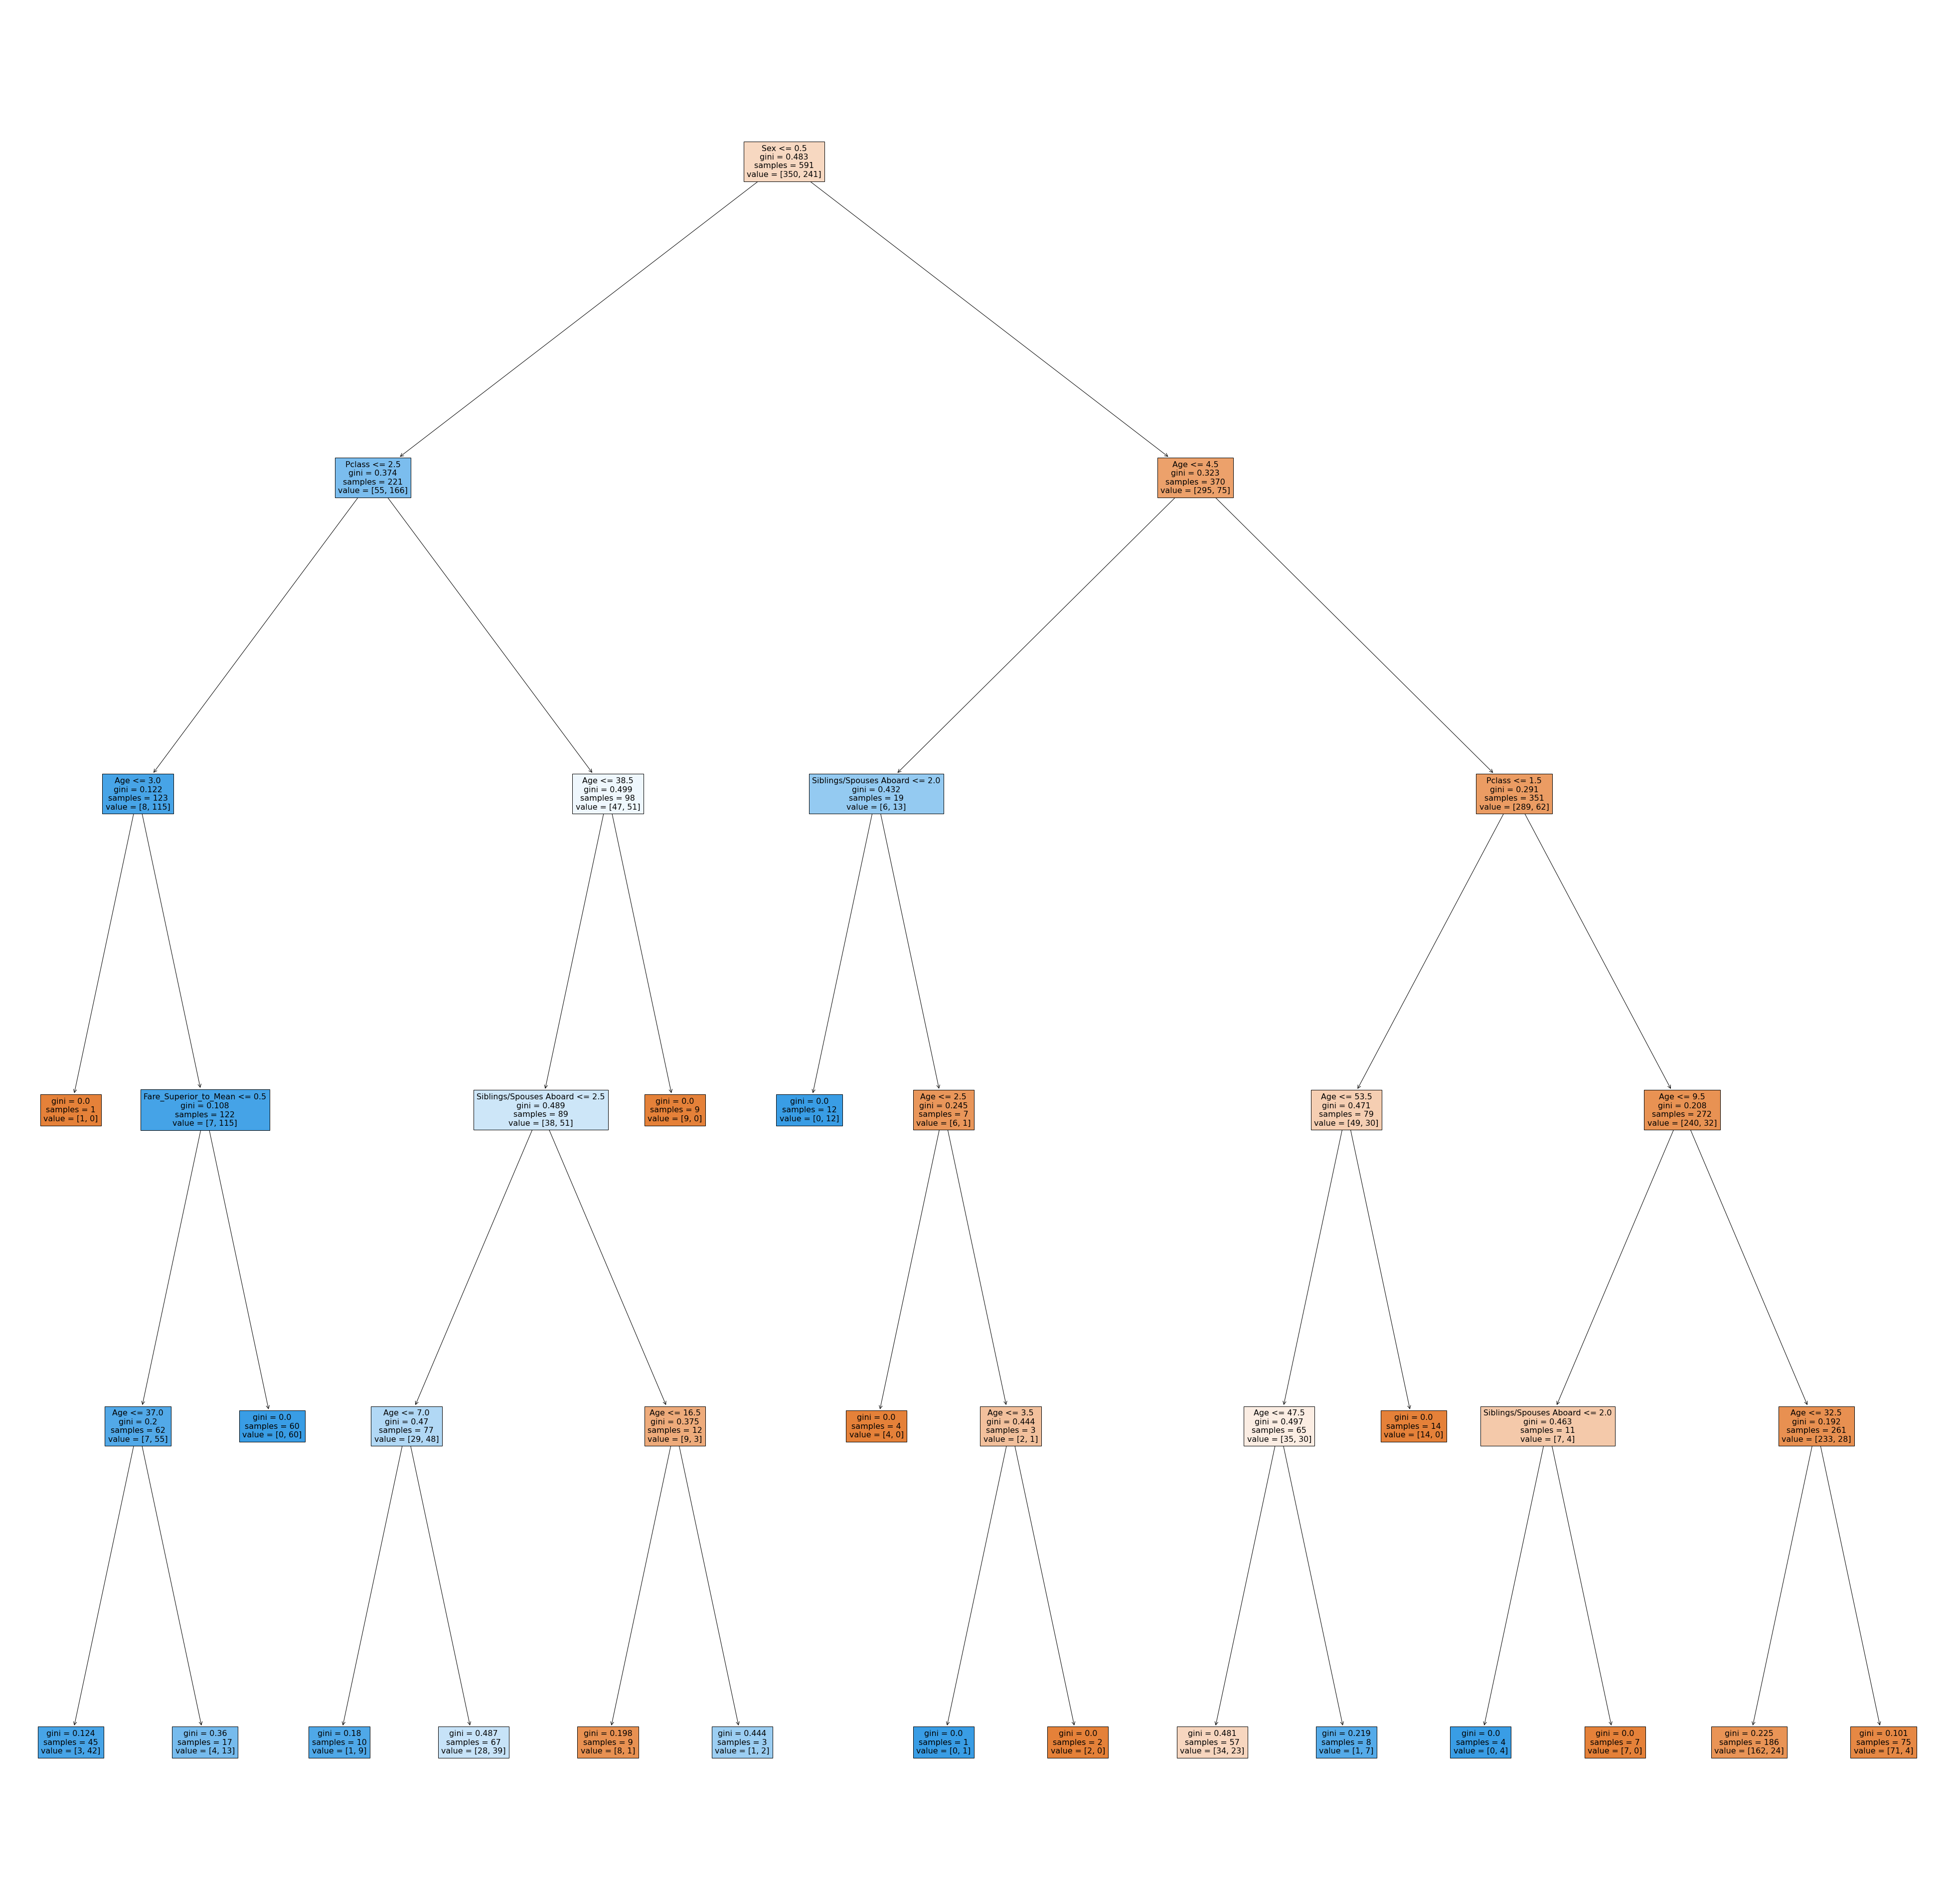

<Figure size 5040x5040 with 0 Axes>

In [76]:
# Visualize Tree
plot_tree(clf,feature_names = list(titanic_features),filled=True)
plt.figure()
plt.rc('figure', figsize=[70, 70])

### Test

#### Statistics

In [72]:
y_pred = clf.predict(X_test)

In [71]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       195
           1       0.74      0.77      0.76       101

    accuracy                           0.83       296
   macro avg       0.81      0.82      0.81       296
weighted avg       0.83      0.83      0.83       296



#### ROC Curve

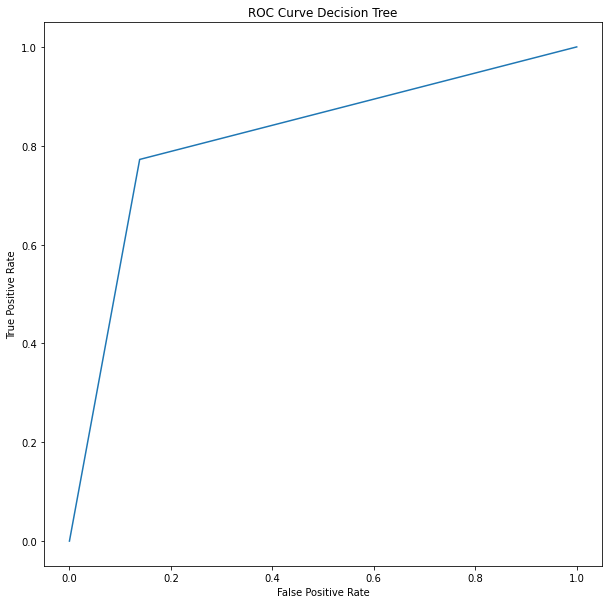

<Figure size 720x720 with 0 Axes>

In [69]:
dt_fpr, dt_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.title("ROC Curve Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(dt_fpr,dt_tpr)
plt.figure()
plt.rc('figure', figsize=[10, 10])

In [70]:
dt_auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC for the Decision Tree is ",dt_auc)

The AUC for the Decision Tree is  0.816907844630617


#### Conclusion

**Conclusion :** Thanks to the Decision Tree, we succeeded to predict with a precision of 82%. 

## 

## Random Forest

### Choosing the Best Parameters

We use this part to determine the best parameters for our random forest. 

In [44]:
list_n_est =[]
list_err = []
list_err_test = []
for i in range(3,50):
    rf = RandomForestClassifier(n_estimators = i, criterion = "gini", random_state = 42)
    rf.fit(Z_train, y_train)
    a = 1-rf.score(Z_train, y_train)
    b = 1-rf.score(Z_test, y_test)
    list_n_est.append(i)
    list_err.append(a)
    list_err_test.append(b)

Text(0, 0.5, 'Error')

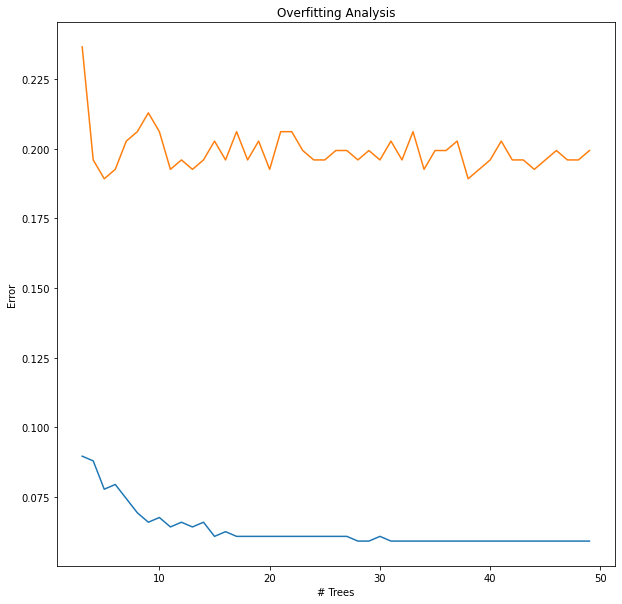

In [45]:
plt.title("Overfitting Analysis")
plt.plot(list_n_est,list_err)
plt.plot(list_n_est,list_err_test)
plt.xlabel("# Trees")
plt.ylabel("Error")

The best number of trees seems to be between 40 and 50. 

In [46]:
parameters = {
    "n_estimators": range(3,101),
    "max_depth": range(3,16)
}

model_random_forest = RandomForestClassifier(criterion = 'gini',random_state=42)
model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='balanced_accuracy',
)

model_random_forest.fit(X_train, y_train)
print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print('-----')

-----
Best parameters {'max_depth': 6, 'n_estimators': 10}
-----


### Train

In [64]:
# Creating an optimize model thanks to previous analysis
rf = RandomForestClassifier(n_estimators = 10, criterion = "gini", max_depth = 6 ,random_state = 42)
rf.fit(Z_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)

### Test

In [65]:
y_pred = rf.predict(Z_test)

### Analysis of Prediction

#### Statistics

In [66]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       195
           1       0.74      0.77      0.76       101

    accuracy                           0.83       296
   macro avg       0.81      0.82      0.81       296
weighted avg       0.83      0.83      0.83       296



#### ROC Curve

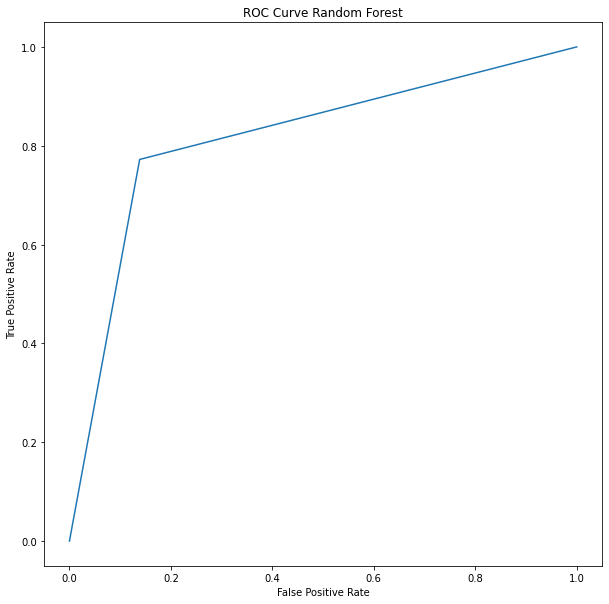

<Figure size 720x720 with 0 Axes>

In [67]:
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.title("ROC Curve Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(rf_fpr,rf_tpr)
plt.figure()
plt.rc('figure', figsize=[10, 10])

In [68]:
rf_auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC for the Decision Tree is ",rf_auc)

The AUC for the Decision Tree is  0.816907844630617


## 

## XG Boost Tree Version

### Choosing the Best Parameters

In [52]:
parameters = {
    'max_depth': range(3,16), 
    'n_estimators': range(5,101),
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier(random_state = 42,)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print('-----')

-----
Best parameters {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 49}
-----


### Train

In [59]:
boosting = xgb.XGBClassifier(n_estimators = 49, max_depth = 9, learning_rate = 0.01, random_state = 42)
boosting.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=49, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Test 

In [60]:
y_pred = boosting.predict(X_test)

### Analysis of Prediction

#### Statistics

In [61]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       195
           1       0.75      0.67      0.71       101

    accuracy                           0.81       296
   macro avg       0.79      0.78      0.78       296
weighted avg       0.81      0.81      0.81       296



#### ROC Curve 

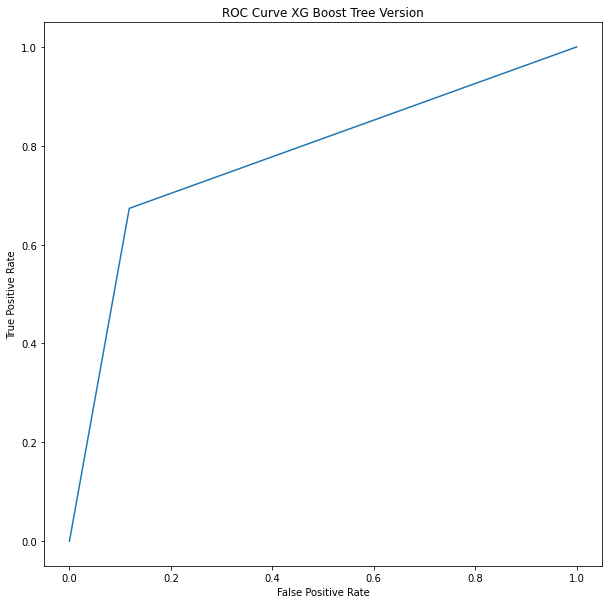

<Figure size 720x720 with 0 Axes>

In [62]:
xgbt_fpr, xgbt_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.title("ROC Curve XG Boost Tree Version")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(xgbt_fpr,xgbt_tpr)
plt.figure()
plt.rc('figure', figsize=[10, 10])

In [63]:
xgbt_auc = metrics.roc_auc_score(y_test, y_pred)
print("The AUC for the XG Boost Tree Version is ",xgbt_auc)

The AUC for the XG Boost Tree Version is  0.7776593043919777


## 

# General Conclusion 

The two best models in order to predict who died and woh survived to the Titanic's Disaster are the Random Forest and the Decision Tree (AUC and Accuracy). 

Due to the complexety of the Random Forest Algorithm, we probably choose to use the Decision Trees which are less complex and give, for this problem, the same result.